In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./tweet_emotions.csv",sep=",")
df = df.drop('tweet_id', axis=1)

In [4]:
df

,sentiment,content
0,empty,@tiffanylue i know i was listenin to bad habi...
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
3,enthusiasm,wants to hang out with friends SOON!
4,neutral,@dannycastillo We want to trade with someone w...
...,...,...
39995,neutral,@JohnLloydTaylor
39996,love,Happy Mothers Day All my love
39997,love,Happy Mother's Day to all the mommies out ther...
39998,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


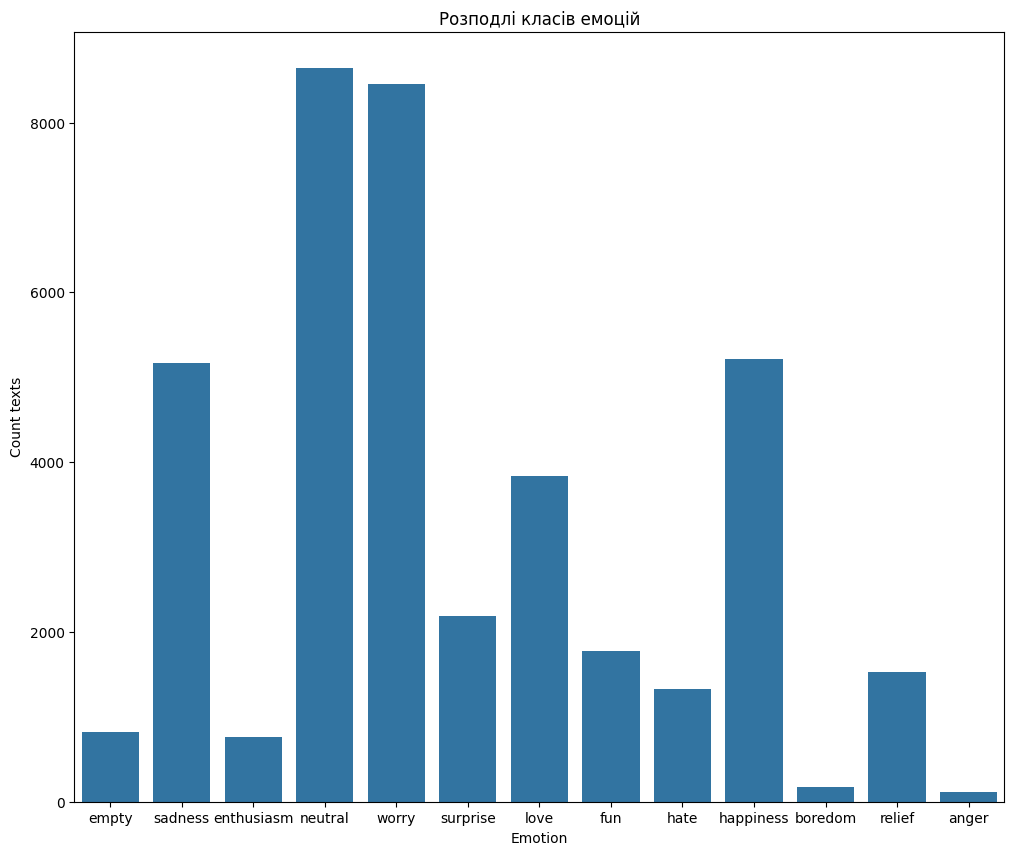

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,10))

sns.countplot(x=df['sentiment'],ax=ax)
plt.title("Розподлі класів емоцій")
plt.xlabel('Emotion')
plt.ylabel("Count texts")
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  40000 non-null  object
 1   content    40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB


In [5]:
import re
import spacy
nlp = spacy.load("en_core_web_sm")

In [6]:
stop_words = nlp.Defaults.stop_words

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return ' '.join(tokens)

In [15]:
texts = df['content']

texts_clean = texts.apply(preprocess_text)


In [16]:
df['content'] = texts_clean
# df.to_csv("cleaned_data_about_emotion.csv",index=False)

In [18]:
df = df[df['sentiment'] != "empty"]

In [20]:
df.to_csv("cleaned_data_about_emotion.csv",index=False)

# EDA

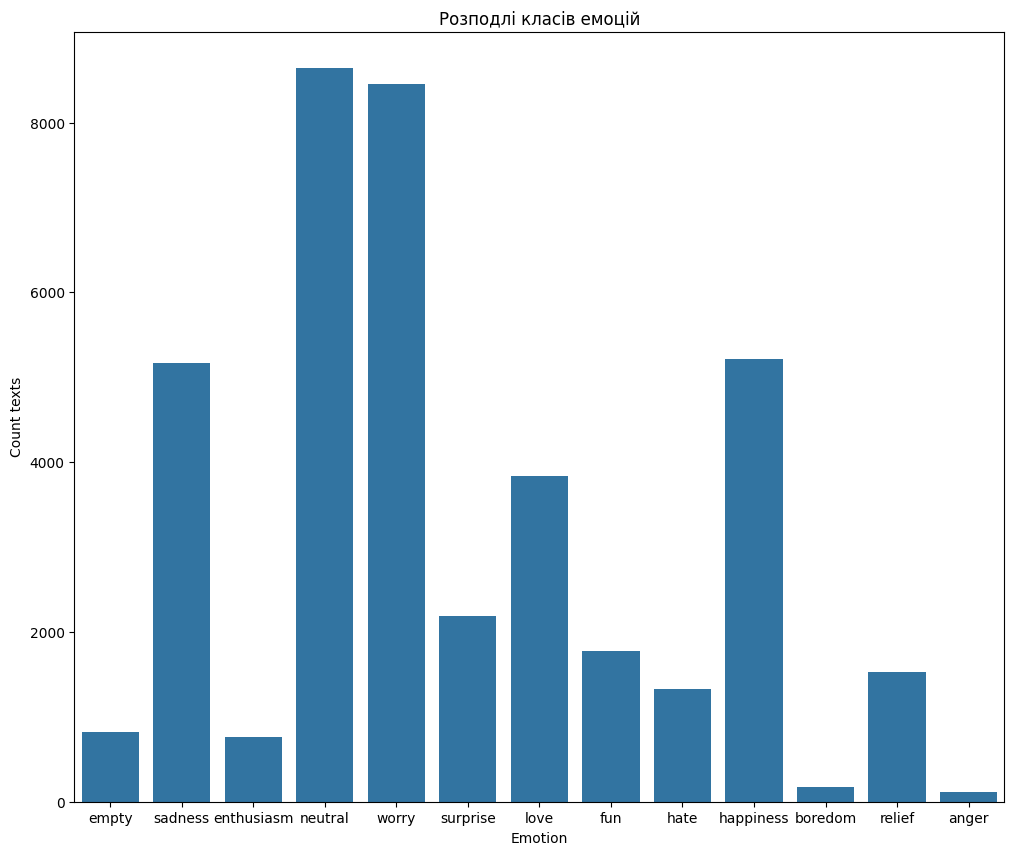

In [14]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,10))

sns.countplot(x=df['sentiment'],ax=ax)
plt.title("Розподлі класів емоцій")
plt.xlabel('Emotion')
plt.ylabel("Count texts")
plt.show()

Як бачомо по розподілу кількості різних видів емоції, маємо **boredom and anger** дуже низькі в кількості, ми це зауважимо та в подальшому будемо стежити на ефективність навчання моделі, якщо точність буде поганою то ми видалимо ознаки **boredom and anger**. Також є **empty** - що не зрозуміло чи це емоція або просто так позначили відсутність емоції.

count    40000.000000
mean        13.216875
std          6.971528
min          1.000000
25%          7.000000
50%         12.000000
75%         19.000000
max         34.000000
Name: text_len_words, dtype: float64


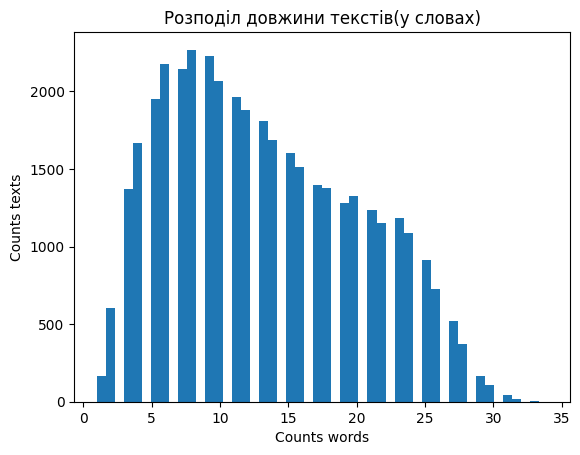

In [ ]:
df_stats = df
df_stats['text_len_words'] = df['content'].apply(lambda x: len(str(x).split()))

df_stats['text_len_chars'] = df['content'].apply(lambda x: len(str(x)))

print(df['text_len_words'].describe())

plt.hist(df['text_len_words'],bins=50)
plt.title("Розподіл довжини текстів(у словах)")
plt.xlabel("Counts words")
plt.ylabel("Counts texts")
plt.show()

In [24]:
from collections import Counter
all_words = ' '.join(df['content']).lower().split()
word_counts = Counter(all_words)

print(word_counts.most_common(20))

[('i', 18892), ('to', 14249), ('the', 12844), ('a', 9621), ('my', 7980), ('and', 7243), ('you', 6098), ('is', 5585), ('in', 5251), ('for', 5244), ('it', 4806), ('of', 4474), ('on', 4008), ('have', 3720), ('so', 3539), ('that', 3335), ('me', 3273), ('but', 3194), ('just', 3129), ("i'm", 3105)]


In [27]:
print(df['content'].isnull().sum())


0


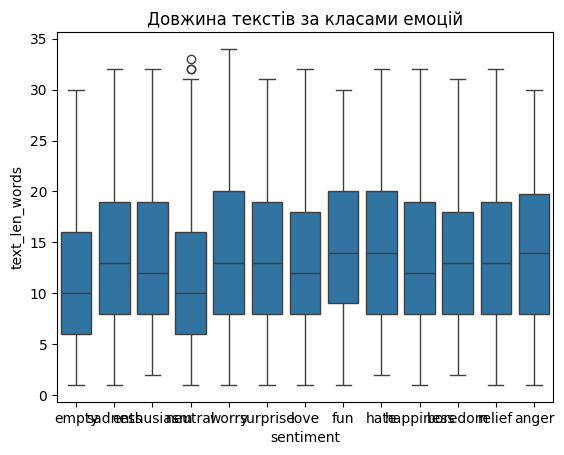

In [34]:
sns.boxplot(x='sentiment', y='text_len_words', data=df,)
plt.title('Довжина текстів за класами емоцій')
plt.show()


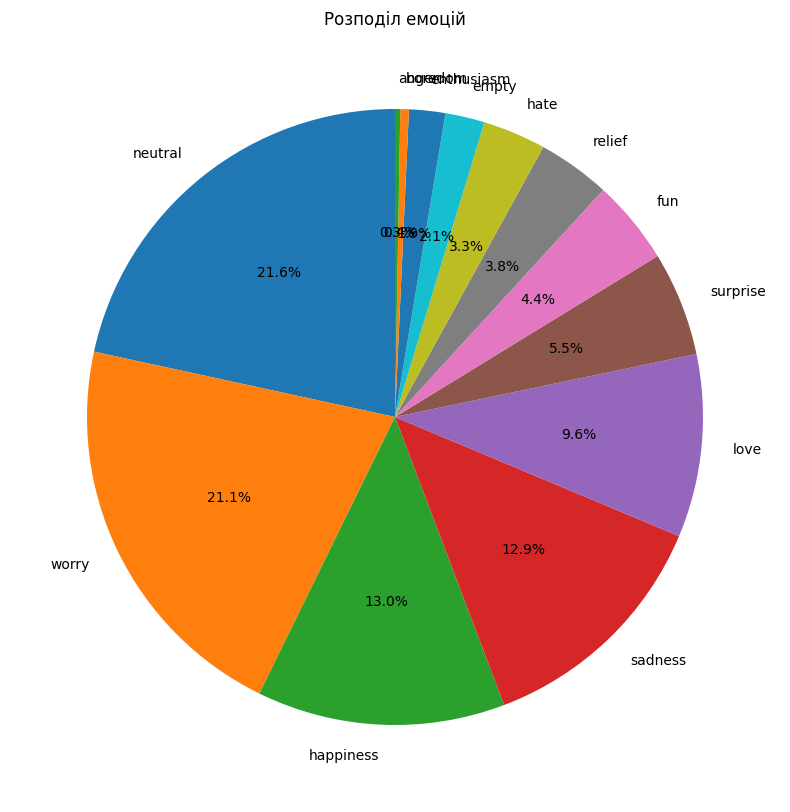

In [36]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(12,10))
plt.pie(sentiment_counts, labels=sentiment_counts.index, startangle=90, autopct='%1.1f%%')
plt.title('Розподіл емоцій')
plt.show()